# GP optimizer for one single hexapole

**Note**: In order to use it on a specific machine, you should build machine interface (setX and get_state functions).


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.insert(1, '/home/cz489/STEMalign_BO/GPTrelated')
saveResultsQ = False
import scipy

failed to import parallelstuff


### Creat the machine interface

In [10]:
ndim = 2 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
start_point = [[3,-8.9]]
#min-max range

#creat machine interface
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
# mi_module = importlib.import_module('multinormal')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) 
# assuming an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background 
# noise with std dev = 0.1

In [11]:
print(mi.x)
#check the reading objective is working
print(mi.getState())

[[ 3.  -8.9]]
(array([[ 3. , -8.9]]), array([[-1549620.78792957]]))


/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [21]:
#check noise std
y = [mi.getState()[1][0] for x in range(5)]
np.std(y)

0.0

### Create the gp

In [12]:
gp_ls = np.array(np.ones(ndim))
gp_amp = 1.8e5 # default = 1
gp_noise = 0.00011  # default = 0.001

gp_precisionmat =  np.array(np.diag(1/(gp_ls**2)))
hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP

gp = OGP(ndim, hyps,prmean=0)

### Create the BO

In [13]:
#create the bayesian optimizer that will use the gp as the model to optimize the machine 
opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
opt.ucb_params = np.array([2, None])

target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7fe807911748>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[ 3.  -8.9]]
y_init [[-1549620.78792957]]
Using prior mean function of  0
Using prior mean parameters of  None


**Running BO**

*run the gp search for some number of steps*

In [14]:
Obj_state_s=[]
Obj_state_s.append(mi.getState()[1][0])

In [ ]:
temp = opt.OptIter()
print(temp)

In [21]:
temp[1][0][0]

-5945512.4163385825

In [15]:
# Test over single starting point
Niter = 20
Status_array = np.zeros([Niter + 1, 4]) # save the 
Status_array[0,0] = opt.current_x[0][0]
Status_array[0,1] = opt.current_x[0][1]
Status_array[0,2] = Status_array[0,3] = mi.getState()[1][0]
for i in range(Niter):
    
    print ('iteration =', i)
    print ('current position:', mi.x, 'current best seen objective value:', Obj_state_s[-1])
    
    # calculate UCB, model prediction, and plot part, only necessary when debugging.

#     fig = plt.figure(figsize=(20,5))
#     x = np.linspace(-10,10,100)
#     y = np.linspace(-10,10,100)
#     UCB = np.zeros((100,100))
#     yval = UCB*0
#     yerr = UCB*0
#     for i in range(len(x)):
#         for j in range(len(y)):
#             UCB[i,j] = negUCB([x[i],y[j]],opt.model, 2, 0, 2, None)
#             yval[i,j] = opt.model.predict(np.array([x[i],y[j]],ndmin=2))[0][0]
# #             yerr[i,j] = opt.model.predict(np.array([x[i],y[j]],ndmin=2))[1][0]  # yerr matrix is not very helpful
            
#     plt.subplot(121)
#     plt.imshow(UCB,origin='lower')
#     plt.colorbar()
    
#     plt.subplot(122)
#     plt.imshow(yval,origin='lower')
#     plt.colorbar()
    
#     plt.show()
    # End of plot part
    
#     opt.OptIter()
    temp = opt.OptIter() # save the new acquisition point and objective value
    Obj_state_s.append(opt.best_seen()[1]) # save current best value
    Status_array[i+1, 3] = opt.best_seen()[1][0][0]  # best seen objective so far
    Status_array[i+1, 2] = temp[1][0][0]  # objective at new point
    Status_array[i+1, 0] = temp[0][0][0]  # coordinate of new point
    Status_array[i+1, 1] = temp[0][0][1]
print(opt.best_seen())

iteration = 0
current position: [[ 3.  -8.9]] current best seen objective value: [-1549620.78792957]
[ 3.  -8.9] [[-1549620.78792957]]
[ 3.  -8.9]
single-processing, minimize, x_start = [3.284619730651591, -8.501047533221433]
Minimizing finished, min point = [ 3.28461973 -8.50104753]
New State: [[ 3.28461973 -8.50104753]], [[-1418829.47450851]]
iteration = 1
current position: [[ 3.28461973 -8.50104753]] current best seen objective value: [[-1418829.47450851]]
[ 3.28461973 -8.50104753] [[-1418829.47450851]]
[ 3.28461973 -8.50104753]
single-processing, minimize, x_start = [3.6977929198797415, -8.16991087112434]
Minimizing finished, min point = [ 6. 10.]
New State: [[ 6. 10.]], [[-909560.60057203]]
iteration = 2
current position: [[ 6. 10.]] current best seen objective value: [[-909560.60057203]]
[ 6. 10.] [[-909560.60057203]]
[ 6. 10.]
single-processing, minimize, x_start = [6.176503929027082, 9.507674071818034]
Minimizing finished, min point = [  6. -10.]
New State: [[  6. -10.]], [[-95

Text(0, 0.5, 'Hexapole 2')

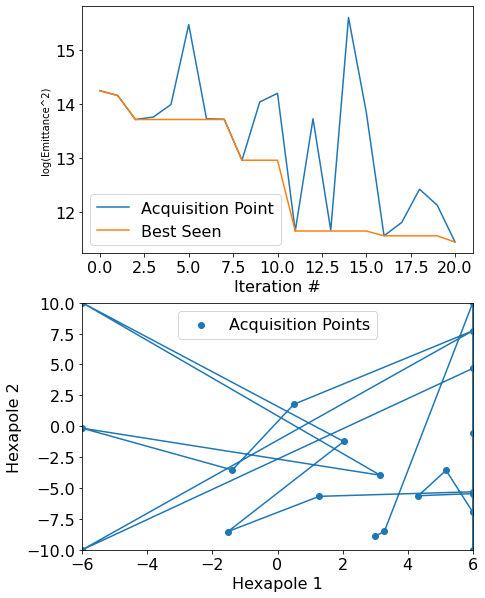

In [16]:
fig = plt.figure(figsize = (7,10))

plt.subplot(211)
plt.plot(np.log(-Status_array[:,2]), '-',c='C0', label = 'Acquisition Point')
plt.plot(np.log(-Status_array[:,3]),c='C1', label = 'Best Seen')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('log(Emittance^2)')

plt.subplot(212)
plt.plot(Status_array[:,0], Status_array[:,1])
plt.scatter(Status_array[:,0], Status_array[:,1], label = 'Acquisition Points')
plt.xlim([-6,6])
plt.ylim([-10,10])
plt.legend(fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Hexapole 1', fontsize = 16)
plt.ylabel('Hexapole 2', fontsize = 16)

(-0.5, 200.5, 200.5, -0.5)

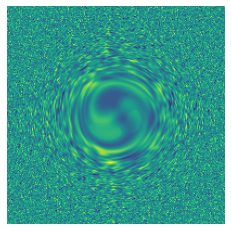

In [102]:
temp = np.load('/home/cz489/STEMalign_BO/ronchigram.npy')
plt.imshow(temp)
plt.axis('off')

/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


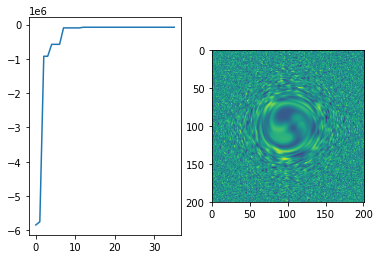

In [101]:
# print(opt.best_seen())
# print(np.asarray(Obj_state_s))
plt.subplot(121)
plt.plot(np.asarray(Obj_state_s))
plt.subplot(122)
temp = np.load('/home/cz489/STEMalign_BO/ronchigram.npy')
plt.imshow(temp)
np.save('Start_point_5.9_4.95_mag3e5_noise10_asymmetric.npy', np.asarray(Obj_state_s))

In [90]:
print(Obj_list[np.argmin(Obj_list[:,2]),0:2])


[ 0.  -9.9]


Text(0, 0.5, 'Emittance^2')

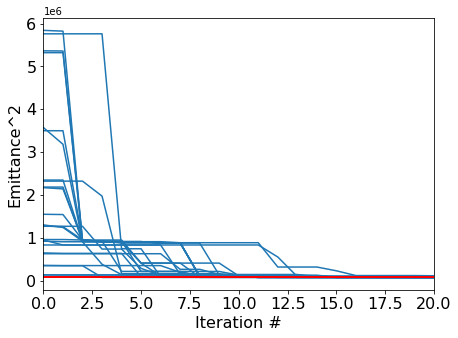

In [87]:
fig = plt.figure(figsize = (7,5))
for i in range(Obj_list.shape[0]):
    plt.plot(-Obj_list[i,2::], ls = '-',c='C0')
plt.xlim([0,20])
grid_search = np.load('2Dscan_-10-10_H1_H2.npy')
plt.axhline(y=-np.amax(grid_search), c='red', linewidth = 2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('Emittance^2', fontsize = 16)

In [9]:
# Test over multiple different starting point
Niter = 15
Ntest_point = 5
H1_list = np.linspace(-5.9,5.9, num = Ntest_point)
H2_list = np.linspace(-9.9,9.9,num = Ntest_point)
Obj_list = np.zeros((Ntest_point * Ntest_point, Niter + 3))
for i1 in range(Ntest_point):
    for i2 in range(Ntest_point):
        count = i1 * Ntest_point + i2
        start_point = [[H1_list[i1],H2_list[i2]]]

        # For each starting point, create a new mi with the new start_point par, then a new opt to connect to the new mi
        mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) 
        gp_ls = np.array(np.ones(ndim))
        gp_amp = 3e5 # default = 1
        gp_noise = 10  # default = 0.001

        gp_precisionmat =  np.array(np.diag(1/(gp_ls**2)))
        hyps = [gp_precisionmat, np.log(gp_amp), np.log(gp_noise**2)] #format the hyperparams for the OGP

        gp = OGP(ndim, hyps,prmean=0)
        
        opt = BayesOpt(gp, mi, acq_func="UCB", start_dev_vals = mi.x, dev_ids = dev_ids)
        opt.ucb_params = np.array([2, None])
        Obj_list[count,0] = H1_list[i1]  # starting points
        Obj_list[count,1] = H2_list[i2]
        Obj_list[count,2] = mi.getState()[1][0]  # initial state

        for i in range(Niter):
            opt.OptIter()
            Obj_list[count,i+3] = opt.best_seen()[1]  # save the best objective in each iteration
#             Obj_state_s.append(opt.best_seen()[1])
        print(str(H1_list[i1]) + ', ' + str(H2_list[i2]) + ' Finished.')
        np.save('DiffStarPointTest_asymmetric.npy',Obj_list)

target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0ee8542d30>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[-5.9 -9.9]]
y_init [[-959958.82380779]]
Using prior mean function of  0
Using prior mean parameters of  None
[-5.9 -9.9] [[-959958.82380779]]
[-5.9 -9.9]
single-processing, minimize, x_start = [array([-5.88277214]), array([-9.90119216])]
Minimizing finished, min point = [-5.88277214 -9.90119216]
New State: [[-5.88277214 -9.90119216]], [[-962354.75984406]]
[-5.9 -9.9] [[-959958.82380779]]
[-5.9 -9.9]
single-processing, minimize, x_start = [array([-5.88277214]), array([-9.90119216])]
Minimizing finished, min point = [ 6.         -9.90119216]
New State: [[ 6.         -9.90119216]], [[-948795.2692584]]
[ 6.         -9.90119216] [[-948795.2692584]]
[ 6.         -9.90119216]
single-processing, minimize, x_start = [array([6.01722786]), array([-9.90238432])]
Minimizing finished, min point

New State: [[ 6.         -5.79280527]], [[-78019.00193133]]
[ 6.         -5.82130735] [[-76785.59879074]]
[ 6.         -5.82130735]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.82249951])]
Minimizing finished, min point = [ 6.        -5.7926061]
New State: [[ 6.        -5.7926061]], [[-78030.20213385]]
-5.9, -4.95 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0ee5ec2e48>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[-5.9  0. ]]
y_init [[-1549620.78792957]]
Using prior mean function of  0
Using prior mean parameters of  None
[-5.9  0. ] [[-1549620.78792957]]
[-5.9  0. ]
single-processing, minimize, x_start = [array([-5.88277214]), array([-0.00119216])]
Minimizing finished, min point = [-5.88277214e+00 -1.19216008e-03]
New State: [[-5.88277214e+00 -1.19216008e-03]], [[-1543083.06402783]]
[-5.88277214e+00 -1.19216008e-03] [[-1543083.06402783]]
[-5.88

New State: [[-6.          4.87139115]], [[-157994.48782865]]
[-5.88277214  4.94880784] [[-131202.83910959]]
[-5.88277214  4.94880784]
single-processing, minimize, x_start = [array([-5.86554429]), array([4.94761568])]
Minimizing finished, min point = [-4.77625147  5.52712657]
New State: [[-4.77625147  5.52712657]], [[-110959.77749902]]
[-4.77625147  5.52712657] [[-110959.77749902]]
[-4.77625147  5.52712657]
single-processing, minimize, x_start = [array([-4.75902361]), array([5.52593441])]
Minimizing finished, min point = [-5.33597884  5.2786756 ]
New State: [[-5.33597884  5.2786756 ]], [[-75789.57395784]]
-5.9, 4.950000000000001 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0ee80af550>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[-5.9  9.9]]
y_init [[-921690.44120017]]
Using prior mean function of  0
Using prior mean parameters of  None
[-5.9  9.9] [[-921690.44120017]]
[-5

New State: [[ 6.         -5.79480629]], [[-77927.09587013]]
[ 6.         -5.82130735] [[-76785.59879074]]
[ 6.         -5.82130735]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.82249951])]
Minimizing finished, min point = [ 6.         -5.79327814]
New State: [[ 6.         -5.79327814]], [[-78050.62728272]]
[ 6.         -5.82130735] [[-76785.59879074]]
[ 6.         -5.82130735]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.82249951])]
Minimizing finished, min point = [ 6.         -5.79280527]
New State: [[ 6.         -5.79280527]], [[-78019.00193133]]
[ 6.         -5.82130735] [[-76785.59879074]]
[ 6.         -5.82130735]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.82249951])]
Minimizing finished, min point = [ 6.        -5.7926061]
New State: [[ 6.        -5.7926061]], [[-78030.20213385]]
-2.95, -9.9 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0f2c9c2160>

New State: [[-3.62299745 -5.19519048]], [[-4780256.45736889]]
[ 0.78751993 -1.2515481 ] [[-89518.05404469]]
[ 0.78751993 -1.2515481 ]
single-processing, minimize, x_start = [array([0.80474779]), array([-1.25274026])]
Minimizing finished, min point = [-0.95906978 -2.57684792]
New State: [[-0.95906978 -2.57684792]], [[-783610.10622313]]
[ 0.78751993 -1.2515481 ] [[-89518.05404469]]
[ 0.78751993 -1.2515481 ]
single-processing, minimize, x_start = [array([0.80474779]), array([-1.25274026])]
Minimizing finished, min point = [ 6. 10.]
New State: [[ 6. 10.]], [[-909560.60057203]]
[ 0.78751993 -1.2515481 ] [[-89518.05404469]]
[ 0.78751993 -1.2515481 ]
single-processing, minimize, x_start = [array([0.80474779]), array([-1.25274026])]
Minimizing finished, min point = [ 1.74247706 -1.08766311]
New State: [[ 1.74247706 -1.08766311]], [[-102412.45501308]]
[ 0.78751993 -1.2515481 ] [[-89518.05404469]]
[ 0.78751993 -1.2515481 ]
single-processing, minimize, x_start = [array([0.80474779]), array([-1.25

New State: [[ 6.         -5.18115131]], [[-119088.92129906]]
[ 6.         -5.18115131] [[-119088.92129906]]
[ 6.         -5.18115131]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.18234347])]
Minimizing finished, min point = [ 6.         -5.24575104]
New State: [[ 6.         -5.24575104]], [[-111113.69183672]]
[ 6.         -5.24575104] [[-111113.69183672]]
[ 6.         -5.24575104]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.2469432])]
Minimizing finished, min point = [ 5.99998893 -5.87408128]
New State: [[ 5.99998893 -5.87408128]], [[-76210.15249007]]
[ 5.99998893 -5.87408128] [[-76210.15249007]]
[ 5.99998893 -5.87408128]
single-processing, minimize, x_start = [array([6.01721679]), array([-5.87527344])]
Minimizing finished, min point = [ 6.         -5.91096382]
New State: [[ 6.         -5.91096382]], [[-76377.42675071]]
[ 5.99998893 -5.87408128] [[-76210.15249007]]
[ 5.99998893 -5.87408128]
single-processing, minimize, x_start = [arr

New State: [[ 6.        -3.8082181]], [[-407017.12179314]]
[ 6.         -5.39253582] [[-99095.24677299]]
[ 6.         -5.39253582]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.39372798])]
Minimizing finished, min point = [ 6.         -5.83450093]
New State: [[ 6.         -5.83450093]], [[-77071.77505842]]
[ 6.         -5.83450093] [[-77071.77505842]]
[ 6.         -5.83450093]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.83569309])]
Minimizing finished, min point = [ 5.99984946 -5.79746349]
New State: [[ 5.99984946 -5.79746349]], [[-77696.74916951]]
[ 6.         -5.83450093] [[-77071.77505842]]
[ 6.         -5.83450093]
single-processing, minimize, x_start = [array([6.01722786]), array([-5.83569309])]
Minimizing finished, min point = [ 6.         -5.79747936]
New State: [[ 6.         -5.79747936]], [[-77696.34065064]]
[ 6.         -5.83450093] [[-77071.77505842]]
[ 6.         -5.83450093]
single-processing, minimize, x_start = [array([

New State: [[4.30739053 1.03100974]], [[-1323763.48355546]]
[ 5.98637624 -6.84914117] [[-122955.30523299]]
[ 5.98637624 -6.84914117]
single-processing, minimize, x_start = [array([6.00360409]), array([-6.85033333])]
Minimizing finished, min point = [-0.04464956  0.71704512]
New State: [[-0.04464956  0.71704512]], [[-103488.75385364]]
[-0.04464956  0.71704512] [[-103488.75385364]]
[-0.04464956  0.71704512]
single-processing, minimize, x_start = [array([-0.0274217]), array([0.71585296])]
Minimizing finished, min point = [ 2.77769962 -6.2919477 ]
New State: [[ 2.77769962 -6.2919477 ]], [[-786553.29713684]]
[-0.04464956  0.71704512] [[-103488.75385364]]
[-0.04464956  0.71704512]
single-processing, minimize, x_start = [array([-0.0274217]), array([0.71585296])]
Minimizing finished, min point = [ 3.31162918 -2.43547873]
New State: [[ 3.31162918 -2.43547873]], [[-125273.26128446]]
[-0.04464956  0.71704512] [[-103488.75385364]]
[-0.04464956  0.71704512]
single-processing, minimize, x_start = [a

New State: [[  6. -10.]], [[-951008.28159938]]
[  6. -10.] [[-951008.28159938]]
[  6. -10.]
single-processing, minimize, x_start = [array([6.01722786]), array([-10.00119216])]
Minimizing finished, min point = [  6. -10.]
New State: [[  6. -10.]], [[-951008.28159938]]
[  6. -10.] [[-951008.28159938]]
[  6. -10.]
single-processing, minimize, x_start = [array([6.01722786]), array([-10.00119216])]
Minimizing finished, min point = [  6. -10.]
New State: [[  6. -10.]], [[-951008.28159938]]
[  6. -10.] [[-951008.28159938]]
[  6. -10.]
single-processing, minimize, x_start = [array([6.01722786]), array([-10.00119216])]
Minimizing finished, min point = [  6. -10.]
New State: [[  6. -10.]], [[-951008.28159938]]
[  6. -10.] [[-951008.28159938]]
[  6. -10.]
single-processing, minimize, x_start = [array([6.01722786]), array([-10.00119216])]
Minimizing finished, min point = [  6. -10.]
New State: [[  6. -10.]], [[-951008.28159938]]
[  6. -10.] [[-951008.28159938]]
[  6. -10.]
single-processing, minim

New State: [[ 4.87309063 -7.1448276 ]], [[-432097.3185084]]
[ 4.03578728 -5.06611987] [[-144197.51420057]]
[ 4.03578728 -5.06611987]
single-processing, minimize, x_start = [array([4.05301514]), array([-5.06731203])]
Minimizing finished, min point = [-6. 10.]
New State: [[-6. 10.]], [[-921690.44120017]]
[ 4.03578728 -5.06611987] [[-144197.51420057]]
[ 4.03578728 -5.06611987]
single-processing, minimize, x_start = [array([4.05301514]), array([-5.06731203])]
Minimizing finished, min point = [ 1.78869088 -3.22187417]
New State: [[ 1.78869088 -3.22187417]], [[-210085.20405146]]
[ 4.03578728 -5.06611987] [[-144197.51420057]]
[ 4.03578728 -5.06611987]
single-processing, minimize, x_start = [array([4.05301514]), array([-5.06731203])]
Minimizing finished, min point = [ 6.        -2.3195406]
New State: [[ 6.        -2.3195406]], [[-802943.9334776]]
[ 4.03578728 -5.06611987] [[-144197.51420057]]
[ 4.03578728 -5.06611987]
single-processing, minimize, x_start = [array([4.05301514]), array([-5.06731

New State: [[ 6. 10.]], [[-909560.60057203]]
[ 6. 10.] [[-909560.60057203]]
[ 6. 10.]
single-processing, minimize, x_start = [array([6.01722786]), array([9.99880784])]
Minimizing finished, min point = [ 6. 10.]
New State: [[ 6. 10.]], [[-909560.60057203]]
[ 6. 10.] [[-909560.60057203]]
[ 6. 10.]
single-processing, minimize, x_start = [array([6.01722786]), array([9.99880784])]
Minimizing finished, min point = [ 6. 10.]
New State: [[ 6. 10.]], [[-909560.60057203]]
[ 6. 10.] [[-909560.60057203]]
[ 6. 10.]
single-processing, minimize, x_start = [array([6.01722786]), array([9.99880784])]
Minimizing finished, min point = [ 6. 10.]
New State: [[ 6. 10.]], [[-909560.60057203]]
2.950000000000001, 9.9 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0ee5f697b8>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[ 5.9 -9.9]]
y_init [[-951008.28159938]]
Using prior mean function of  0
Using pr

New State: [[ 5.92250148 -5.69942874]], [[-78819.75774369]]
[ 5.9172263  -5.72010378] [[-77425.10978553]]
[ 5.9172263  -5.72010378]
single-processing, minimize, x_start = [array([5.93445415]), array([-5.72129594])]
Minimizing finished, min point = [ 5.91770773 -5.69875201]
New State: [[ 5.91770773 -5.69875201]], [[-78395.41630372]]
[ 5.9172263  -5.72010378] [[-77425.10978553]]
[ 5.9172263  -5.72010378]
single-processing, minimize, x_start = [array([5.93445415]), array([-5.72129594])]
Minimizing finished, min point = [ 5.87778596 -5.69844857]
New State: [[ 5.87778596 -5.69844857]], [[-76880.13441647]]
5.9, -4.95 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0eeb698a90>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[5.9 0. ]]
y_init [[-1301339.51636746]]
Using prior mean function of  0
Using prior mean parameters of  None
[5.9 0. ] [[-1301339.51636746]]
[5.9 0. ]
single-proce

New State: [[5.91722786 4.94880784]], [[-5330419.36169608]]
[5.9  4.95] [[-5321683.93689869]]
[5.9  4.95]
single-processing, minimize, x_start = [array([5.91722786]), array([4.94880784])]
Minimizing finished, min point = [5.91722786 4.94880784]
New State: [[5.91722786 4.94880784]], [[-5330419.36169608]]
[5.9  4.95] [[-5321683.93689869]]
[5.9  4.95]
single-processing, minimize, x_start = [array([5.91722786]), array([4.94880784])]
Minimizing finished, min point = [5.91722786 4.94880784]
New State: [[5.91722786 4.94880784]], [[-5330419.36169608]]
5.9, 4.950000000000001 Finished.
target_func =  <machine_interfaces.machine_interface_GPT.machine_interface object at 0x7f0ee81d6710>
********* BO - self.mi = self.target_func wORKED!
Supposed to be grabbing initial machine state...
x_init [[5.9 9.9]]
y_init [[-832885.49506187]]
Using prior mean function of  0
Using prior mean parameters of  None
[5.9 9.9] [[-832885.49506187]]
[5.9 9.9]
single-processing, minimize, x_start = [array([5.91722786]),

In [25]:
grid_search = np.load('2Dscan_-10-10_H1_H2.npy')
np.amax(grid_search)

-76330.25573555657

Text(0, 0.5, 'Emittance^2')

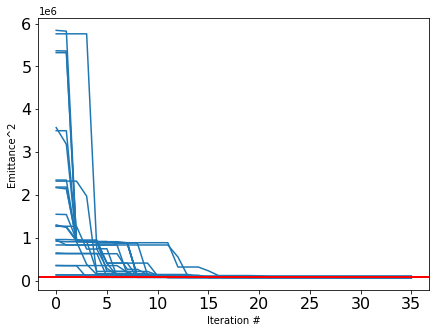

In [81]:
fig = plt.figure(figsize = (7,5))
for i in range(Obj_list.shape[0]):
    plt.plot(-Obj_list[i,2::], '-',c='C0')
grid_search = np.load('2Dscan_-10-10_H1_H2.npy')
plt.axhline(y=-np.amax(grid_search), c='red', linewidth = 2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Iteration #', fontsize = 16)
plt.ylabel('Emittance^2')

In [28]:
Obj_list = np.load('DiffStarPointTest_asymmetric.npy')
idx = np.where(Obj_list[:,-1]<-100000)
print(Obj_list[idx,0:2])
print(idx)

[[[-5.9  -9.9 ]
  [ 0.   -9.9 ]
  [ 2.95 -9.9 ]
  [ 2.95  4.95]
  [ 2.95  9.9 ]
  [ 5.9  -9.9 ]
  [ 5.9   0.  ]
  [ 5.9   4.95]]]
(array([ 0, 10, 15, 18, 19, 20, 22, 23]),)


## Test behavior of the negative UCB function and scipy.optimize.minimize

In [8]:
print(opt.OptIter())
# print('negUCB = ' + str(negUCB([4.0,4.0], opt.model, 1, 0)))
# print(opt.model.predict(np.array([4.9,4.9],ndmin=2)))

[7.9 7.1] [[-924053.03617951]]
[7.9 7.1]
single-processing, minimize, x_start = [0, 0]
Minimizing finished, min point = [0. 0.]
New State: [[0. 0.]], [[-76330.25573556]]
(array([[0., 0.]]), array([[-76330.25573556]]))


In [9]:
opt.acq_func[0]

'UCB'

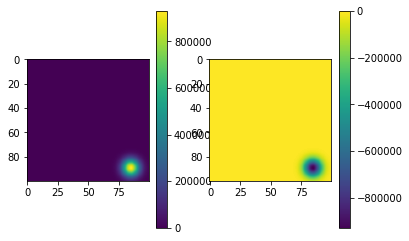

In [10]:
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
UCB = np.zeros((100,100))
yval = UCB*0
yerr = UCB*0
for i in range(len(x)):
    for j in range(len(y)):
        UCB[i,j] = negUCB([x[i],y[j]],opt.model, 1, 0)
        yval[i,j] = opt.model.predict(np.array([x[i],y[j]],ndmin=2))[0][0]
        yerr[i,j] = opt.model.predict(np.array([x[i],y[j]],ndmin=2))[1][0]
plt.subplot(121)
plt.imshow(UCB)
plt.colorbar()
plt.subplot(122)
plt.imshow(yval)
plt.colorbar()

In [21]:
bnds = [(-10, 10),(-10,10)]
x0 = [7.901, 7.1]
x0 = [x + 0.001 for x in x0]
ndim = 2
nsteps = 1
nu = 2
delta = None
res = scipy.optimize.minimize(negUCB, x0, args=(opt.model, ndim, nsteps, nu, delta), 
                              method='L-BFGS-B',tol=1e-4,bounds=bnds,options={'maxiter':1000})     
print(res.x)

[10. 10.]


In [19]:
len(x0)

2

In [30]:
negUCB([7.899,7.099],opt.model, 1, 0, 2, None)

931715.8967290218

## Scan Test
Test a series of different values for the hexapoles to determine the noise and magnitute that should be used for the GP.
<br>The calculated emittance vs hexpole current can also be used as a reference for the real objective function during the GP test.

In [17]:
# 1D scan along hex1 = hex2
ndim = 1 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation
dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
hex_list = np.linspace(-10,10,num=50)
emit_list = []

for i in range(len(hex_list)):
    start_point = [[hex_list[i]]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_list.append(mi.getState()[1][0])
    print(hex_list[i], emit_list[-1])

/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/nfs/user/cz489/venv/lib64/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


-10.0 [-6010044.18388522]
-9.591836734693878 [-5803943.05283824]
-9.183673469387756 [-5274068.99946493]
-8.775510204081632 [-4800190.24478108]
-8.36734693877551 [-4065848.67821741]
-7.959183673469388 [-3501068.55207373]
-7.551020408163265 [-3046295.96552797]
-7.142857142857142 [-2554342.6279606]
-6.73469387755102 [-2173358.50183937]
-6.326530612244898 [-1632784.74492598]
-5.918367346938775 [-1558851.76021485]
-5.5102040816326525 [-1408022.94394324]
-5.1020408163265305 [-1339410.76974713]
-4.6938775510204085 [-1146042.58202574]
-4.285714285714286 [-958220.81320743]
-3.8775510204081627 [-939958.14012719]
-3.4693877551020407 [-754303.25934222]
-3.0612244897959187 [-666921.00135978]
-2.6530612244897958 [-550083.11045413]
-2.244897959183673 [-439612.63489431]
-1.8367346938775508 [-307188.53196098]
-1.4285714285714288 [-209582.38070512]
-1.020408163265305 [-143353.41252595]
-0.612244897959183 [-97976.42496676]
-0.204081632653061 [-77537.29619652]
0.204081632653061 [-77609.35824669]
0.6122448

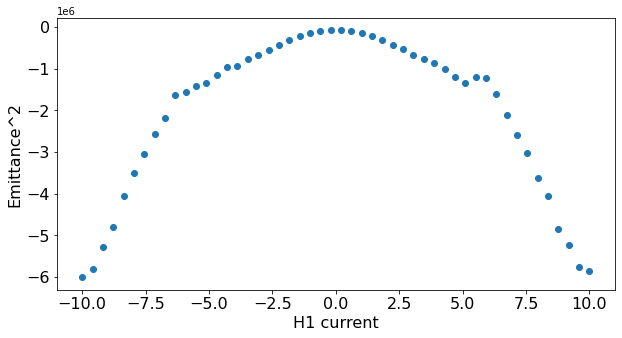

In [18]:
fig = plt.figure(figsize = [10,5])
plt.scatter(hex_list, np.asarray(emit_list))
plt.ylabel('Emittance^2',fontsize = 16)
plt.xlabel('H1 current',fontsize  = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.savefig('hex_scan_h1=-100_100_h2=8.png')

np.save('emit_list_ref_H1=-10_10_100steps.npy',np.asarray(emit_list))
np.save('hex_list_ref_H1=-10_10_100steps.npy',hex_list)

In [9]:
hex_list = np.load("hex_list_ref_H1=-10_10_100steps.npy")
emit_list = np.load("emit_list_ref_H1=-10_10_100steps.npy")

10.0 10.0 -1274515.0433124676


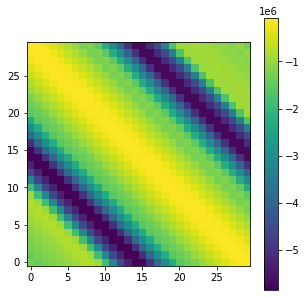

In [5]:
# 2D parameter scan for all (hex1, hex2) pairs
ndim = 2 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation
dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
hex_list = np.linspace(-10,10,num=30)
emit_matrix = np.zeros([30, 30])

for i in range(len(hex_list)):
    for j in range(len(hex_list)):
        imgname = '/home/cz489/STEMalign_BO/SimulationResults/ronchigram_'+ str(i)+'_'+str(j)+'.npy'
        txtname = '/home/cz489/STEMalign_BO/SimulationResults/outscope_'+ str(i)+'_'+str(j)+'.txt'
        if os.path.exists(txtname):
            emit_matrix[i,j] = calcEmittance(txtname)
        else:
            start_point = [[hex_list[i],hex_list[j]]]  # use H1 = H2 = 25 as default start, following Cameron's setup
            mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
            mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
            emit_matrix[i,j] = mi.getState()[1][0]
            
            
#             os.rename("/home/cz489/STEMalign_BO/outscope.txt", txtname)
#             os.rename("/home/cz489/STEMalign_BO/ronchigram.npy", imgname)
        
        clear_output(wait=True)
        print(hex_list[i], hex_list[j], emit_matrix[i,j])
        fig = plt.figure(figsize = [5,5])
        plt.imshow(emit_matrix, origin='lower')
        plt.colorbar()
        plt.show()
        fig.savefig('2Dscan_-10-10_H1_H2.png')
        np.save('2Dscan_-10-10_H1_H2.npy',emit_matrix)

            

## Aux Functions

## Previously used scripts